Load all packages you need.

In [11]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

Read the dataset that you prepared yesterday afternoon (without outlier and missing data). 

In [12]:
df = pd.read_csv("../data/diabetes_cleaned.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Mahalanobis_Distance,Multivariate_Outlier
0,6,148.0,72.0,35.0,151.447301,33.6,0.627,50,1,2.604033,False
1,1,85.0,66.0,29.0,151.447301,26.6,0.351,31,0,1.899997,False
2,8,183.0,64.0,NaN,151.447301,23.3,0.672,32,1,3.472098,False
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,1.672739,False
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,5.982070,False
...,...,...,...,...,...,...,...,...,...,...,...
755,10,101.0,76.0,48.0,180.000000,32.9,0.171,63,0,4.086515,False
756,2,122.0,70.0,27.0,151.447301,36.8,0.340,27,0,1.718435,False
757,5,121.0,72.0,23.0,112.000000,26.2,0.245,30,0,1.488946,False
758,1,126.0,60.0,NaN,151.447301,30.1,0.349,47,1,3.019401,False


Create a scatterplot for the variables "BMI" and "BloodPressure".

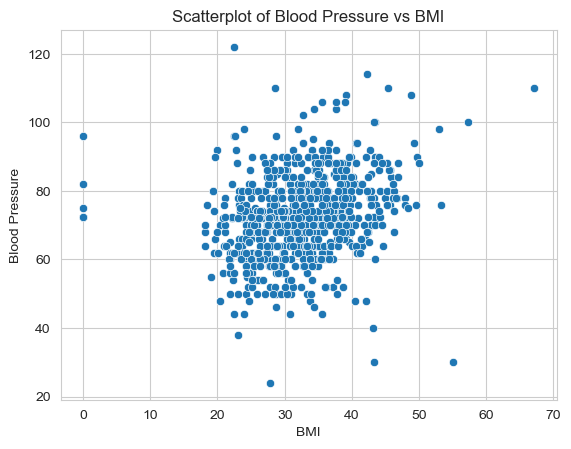

In [13]:
sns.scatterplot(data=df, x='BMI', y='BloodPressure')

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.title('Scatterplot of Blood Pressure vs BMI')

# Show the plot
plt.show()

We want to perform PCA on these two variables. But before we can do that, we need to normalize the data to avoid weighting the higher "BloodPressure" stronger than "BMI" values. If a variable is normally distributed (bell curve), a good way approach is z-score scaling. <br>
Inspect the histograms of both variables. If they are normally distributed create a dataframe with the normalized "BloodPressure_norm" and "BMI_norm". 

In [14]:
from scipy.stats import zscore

df['BloodPressure_norm'] = zscore(df['BloodPressure'])
df['BMI_norm'] = zscore(df['BMI'])

Perform a Principal Component Analyis (PCA) on the two variables and print the eigenvalues, the percentage of the explained variance, and the eigenvectors of the the PCs

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['BloodPressure_norm', 'BMI_norm']].values

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)

# Extract PCA results
eigenvalues = pca.explained_variance_  # Eigenvalues
explained_variance_ratio = pca.explained_variance_ratio_  # Variance explained by each PC
eigenvectors = pca.components_  # Principal components (eigenvectors)

# Print results
print("Eigenvalues:", eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio)
print("Eigenvectors (Principal Components):")
print(eigenvectors)

Eigenvalues: [1.23139081 0.77124424]
Explained Variance Ratio: [0.61488528 0.38511472]
Eigenvectors (Principal Components):
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


## Experiments with PCA

In [28]:
# Drop rows with any NaN values
df = df.dropna()

# Standardize the data (Z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # Standardizing all numeric columns

# Perform PCA (retain all components)
pca = PCA()
pca.fit(X_scaled)

# Transform the data into the new PCA space
df_pca = pd.DataFrame(pca.transform(X_scaled), columns=[f'PC{i+1}' for i in range(len(df.columns))])
df_pca['Outcome'] = df['Outcome'].values
df_pca['Glucose'] = df['Glucose'].values
df_pca['BloodPressure'] = df['BloodPressure'].values
df_pca['BMI'] = df['BMI'].values
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,Outcome,Glucose,BloodPressure,BMI
0,1.655521,-1.027849,-0.612693,0.824055,-0.056987,1.020814,0.091038,0.494829,0.016501,0.923070,-1.901691e-27,-3.494174e-16,-2.255155e-16,1,148.0,72.0,33.6
1,-1.930216,0.002107,0.292332,0.023976,-0.171706,-0.590881,0.538092,-0.055633,-0.243656,0.842681,-4.164877e-28,1.441609e-16,-2.808817e-16,0,85.0,66.0,26.6
2,-2.484015,0.470739,0.703980,-0.193327,-0.437725,0.080999,0.256629,-0.339145,-0.064677,0.011319,1.396308e-27,1.600169e-16,-2.503257e-16,0,89.0,66.0,28.1
3,2.130746,2.020539,-5.773680,1.123159,4.510341,-0.658319,-0.092291,-0.212119,1.577178,-0.160854,5.777928e-28,-3.475073e-16,5.274296e-16,1,137.0,40.0,43.1
4,-1.359243,0.761442,-1.498749,1.524189,-0.347171,0.740172,1.526018,-1.389097,0.222615,0.014231,5.445353e-27,1.951146e-16,-1.582157e-17,1,78.0,50.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,2.948681,-0.064174,-0.378554,1.091960,-0.903736,1.391923,-1.089743,0.053715,0.298121,-0.464139,1.238253e-27,-2.558252e-16,-6.699572e-17,1,170.0,74.0,44.0
531,2.139944,-1.650458,0.667125,2.515642,-1.097668,-1.979677,1.084059,0.436472,0.618880,0.588332,-3.840156e-27,2.811391e-17,7.539260e-17,0,101.0,76.0,32.9
532,-0.516692,1.090478,0.524910,-0.186392,-0.554620,0.061173,-0.855014,0.207125,-0.031749,0.133626,-2.119021e-28,3.213335e-17,5.602277e-19,0,122.0,70.0,36.8
533,-1.612501,-0.935403,0.833779,-0.063645,-0.649146,0.283181,-0.239012,0.562244,-0.406616,-0.127693,-2.226337e-27,-1.531982e-16,-3.619741e-16,0,121.0,72.0,26.2


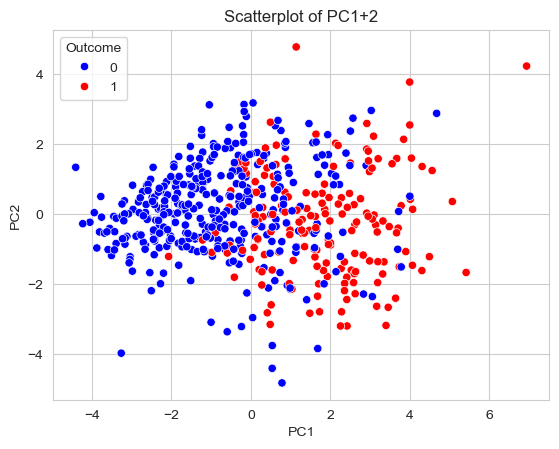

In [26]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue="Outcome", palette={1: 'red', 0: 'blue'})

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of PC1+2')

# Show the plot
plt.show()

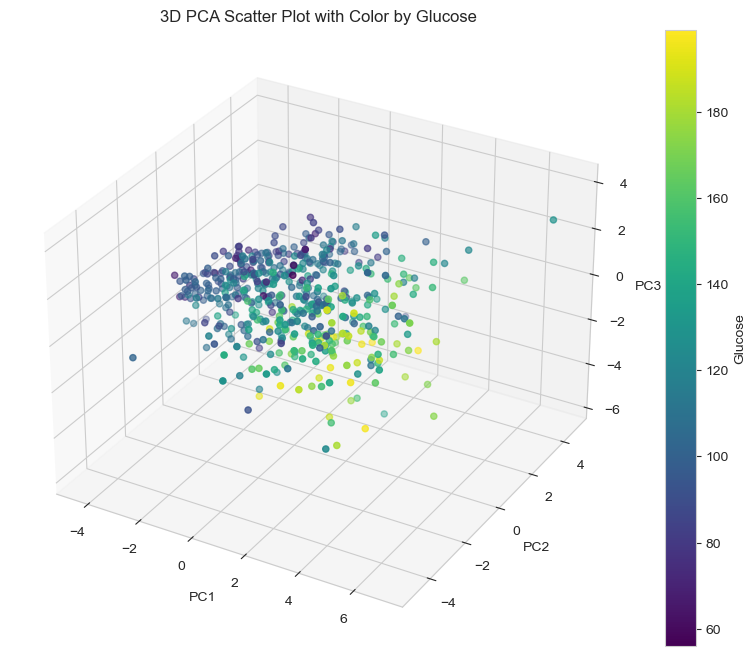

In [34]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: x=PC1, y=PC2, z=PC3, color points by Glucose
sc = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Glucose'], cmap='viridis')

# Add labels and color bar
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Scatter Plot with Color by Glucose')

# Add color bar
plt.colorbar(sc, label='Glucose')

# Show the plot
plt.show()